In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import StrMethodFormatter

First of all, let's read all the available files into dataframes.

In [2]:
df_airbnb_market_2019 = pd.read_excel('market_analysis.xlsx')

In [3]:
df_airbnb_market_2020_2022 = pd.read_excel('market_analysis_2020_2022.xlsx')

In [4]:
df_airbnb_amenities = pd.read_excel('amenities.xlsx')

In [5]:
df_airbnb_geo = pd.read_excel('geolocation.xlsx')

In [6]:
df_sales_92252_total = pd.read_excel('sales_properties_total_zipcode_92252.xlsx')

In [7]:
df_sales_92284_total = pd.read_excel('sales_properties_total_zipcode_92284.xlsx')

In [8]:
df_sales_92314_total = pd.read_excel('sales_properties_total_zipcode_92314.xlsx')

In [9]:
df_sales_92315_total = pd.read_excel('sales_properties_total_zipcode_92315.xlsx')

In [10]:
df_sales_92252_pool = pd.read_excel('sales_properties_with_pool_zipcode_92252.xlsx')

In [11]:
df_sales_92284_pool = pd.read_excel('sales_properties_with_pool_zipcode_92284.xlsx')

# General overview of available dataframes
(type of information available, aggregation levels, distribution of values, general quality)

## Airbnb related files

Let's have a look at the dataframes' dimensions:

In [12]:
print(f'The Market Analysis for 2019 dataframe has {df_airbnb_market_2019.shape[0]} rows and {df_airbnb_market_2019.shape[1]} columns.')
print(f'The Market Analysis for 2020-2022 dataframe has {df_airbnb_market_2020_2022.shape[0]} rows and {df_airbnb_market_2020_2022.shape[1]} columns.')
print(f'The Amenities dataframe has {df_airbnb_amenities.shape[0]} rows and {df_airbnb_amenities.shape[1]} columns.')
print(f'The Geolocation dataframe has {df_airbnb_geo.shape[0]} rows and {df_airbnb_geo.shape[1]} columns.')

The Market Analysis for 2019 dataframe has 29928 rows and 14 columns.
The Market Analysis for 2020-2022 dataframe has 116619 rows and 14 columns.
The Amenities dataframe has 49311 rows and 4 columns.
The Geolocation dataframe has 49311 rows and 5 columns.


Apparently they don't have the same number of rows, probably because of different aggregation levels or different number of listings.

### Market Analysis dataframe

In [13]:
df_airbnb_market_2019.head(3)

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,AIR10000347,2019-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,13948.759735,31,1.000000,449.959991,8.0,65.0
1,AIR10000347,2019-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,449.959991,31,0.032258,449.959991,8.0,1.0
2,AIR10000347,2019-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,0.000000,30,0.000000,NaN,NaN,NaN


In [14]:
df_airbnb_market_2020_2022.head(3)

,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2.0,10,899.959991,31,0.064516,449.979996,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2.0,10,13950.000000,31,1.000000,450.000000,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2.0,10,13500.000000,30,1.000000,450.000000,NaN,NaN


In [15]:
df_airbnb_market_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29928 entries, 0 to 29927
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unified_id    29928 non-null  object 
 1   month         29928 non-null  object 
 2   zipcode       29928 non-null  int64  
 3   city          29928 non-null  object 
 4   host_type     29928 non-null  object 
 5   bedrooms      29928 non-null  int64  
 6   bathrooms     29928 non-null  float64
 7   guests        29928 non-null  object 
 8   revenue       29912 non-null  float64
 9   openness      29928 non-null  int64  
 10  occupancy     29928 non-null  float64
 11  nightly rate  23486 non-null  float64
 12  lead time     21897 non-null  float64
 13  length stay   21897 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 2.6+ MB


In [16]:
df_airbnb_market_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116619 entries, 0 to 116618
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unified_id    116619 non-null  int64  
 1   month         116619 non-null  object 
 2   zipcode       116619 non-null  int64  
 3   city          116619 non-null  object 
 4   host_type     116619 non-null  object 
 5   bedrooms      116619 non-null  int64  
 6   bathrooms     116619 non-null  float64
 7   guests        116619 non-null  object 
 8   revenue       116613 non-null  float64
 9   openness      116619 non-null  int64  
 10  occupancy     116619 non-null  float64
 11  nightly rate  93146 non-null   float64
 12  lead time     86025 non-null   float64
 13  length stay   86025 non-null   float64
dtypes: float64(6), int64(4), object(4)
memory usage: 10.7+ MB


Two Market Analysis files have the same structure and can be concatenated via a union.

In [17]:
df_airbnb_market = pd.concat([df_airbnb_market_2019, df_airbnb_market_2020_2022])
df_airbnb_market.shape

(146547, 14)

The resulting frame has the expected dimensions (the sum of rows of two source dataframes and the same number of columns as both of them).

In [18]:
df_airbnb_market.isna().sum()

unified_id          0
month               0
zipcode             0
city                0
host_type           0
bedrooms            0
bathrooms           0
guests              0
revenue            22
openness            0
occupancy           0
nightly rate    29915
lead time       38625
length stay     38625
dtype: int64

In [19]:
df_airbnb_market.duplicated().sum()

0

There are no duplicates. There are some null values, but their amount isn't critical. They will be explored in more detail further on.

In [20]:
#rename columns with spaces in names for easier use
df_airbnb_market.rename(columns={'nightly rate': 'nightly_rate', 'lead time': 'lead_time', 'length stay': 'length_stay'}, inplace=True)

In [21]:
print(f'Number of unique months in Market Analysis: {df_airbnb_market.month.nunique()}')
df_airbnb_market.month.unique()

Number of unique months in Market Analysis: 48


array(['2019-1', '2019-10', '2019-11', '2019-12', '2019-2', '2019-3',
       '2019-4', '2019-5', '2019-6', '2019-7', '2019-8', '2019-9',
       '2020-1', '2020-10', '2020-11', '2020-12', '2020-2', '2020-3',
       '2020-4', '2020-7', '2020-8', '2020-9', '2021-1', '2021-10',
       '2021-11', '2021-12', '2021-2', '2021-3', '2021-4', '2021-5',
       '2021-6', '2021-7', '2021-8', '2021-9', '2022-1', '2022-2',
       '2022-3', '2022-4', '2022-5', '2022-6', '2022-7', '2022-8',
       '2020-5', '2022-10', '2022-11', '2022-12', '2022-9', '2020-6'],
      dtype=object)

In Market Analysis the data is aggregated at month level for the 48 months of 2019-2022.

In [22]:
#check cities in Market Analysis
df_airbnb_market.city.unique()

array(['Big Bear Lake', 'Joshua Tree', 'Big Bear City', 'Yucca Valley'],
      dtype=object)

In [23]:
#check zipcodes in Market Analysis
df_airbnb_market_2019.zipcode.unique()

array([92315, 92252, 92314, 92284], dtype=int64)

The data is already filtered to include only zipcodes for Big Bear and Joshua Tree and their surroundings (zip codes: 92314, 92315, 92284 and 92252), as indicated in the statement.

In [24]:
df_airbnb_market.columns

Index(['unified_id', 'month', 'zipcode', 'city', 'host_type', 'bedrooms',
       'bathrooms', 'guests', 'revenue', 'openness', 'occupancy',
       'nightly_rate', 'lead_time', 'length_stay'],
      dtype='object')

**Let's have a closer look at values and their distributions in Market Analysis dataframe.**

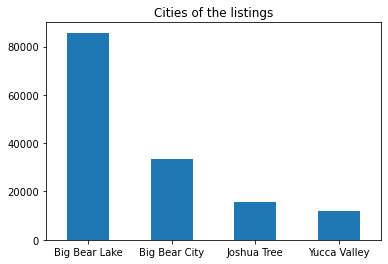

In [25]:
#check the distribution of cities
df_airbnb_market.city.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Cities of the listings')
plt.show()

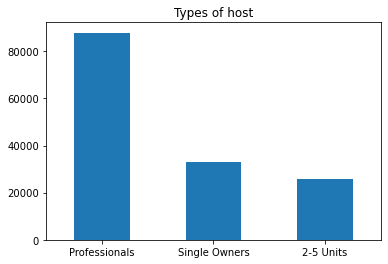

In [26]:
df_airbnb_market.host_type.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Types of host')
plt.show()

Most hosts are professionals.

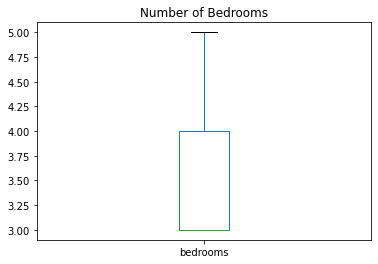

In [27]:
df_airbnb_market.bedrooms.plot.box()
plt.xticks(rotation=0)
plt.title('Number of Bedrooms')
plt.show()

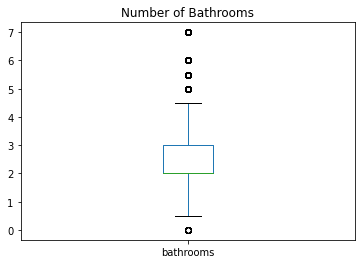

In [28]:
df_airbnb_market.bathrooms.plot.box()
plt.xticks(rotation=0)
plt.title('Number of Bathrooms')
plt.show()

The lower outlier of 0 bathrooms doesn't seem plausible. Let's have a closer look at these listings.

In [29]:
#check number of bedrooms and price for listings with no bathroom
df_airbnb_market.loc[df_airbnb_market['bathrooms']==0, ['bathrooms', 'bedrooms', 'nightly_rate']].describe()

,bathrooms,bedrooms,nightly_rate
count,20.0,20.0,11.000000
mean,0.0,3.0,179.864614
std,0.0,0.0,52.328670
min,0.0,3.0,40.000000
25%,0.0,3.0,170.305376
50%,0.0,3.0,182.600000
75%,0.0,3.0,212.500000
max,0.0,3.0,229.000000


No bathrooms for apartments of aprox. 3 bedrooms and a median of 182 USD per night must be an error and can be imputed with 1.

In [30]:
df_airbnb_market.loc[df_airbnb_market['bathrooms']==0, 'bathrooms'] = 1

In [31]:
df_airbnb_market.guests.unique()

array(['10', '8', '7', '12', '9', '15+', '5', '6', '14', '11', '4', '13',
       '3', '2'], dtype=object)

Given that guests is a string column with numerical variables, it is useful to create a corresponsing numerical column keeping in mind that 15 means 15+. Because of his nuance both columns are kept.

In [32]:
df_airbnb_market['guests_number'] = df_airbnb_market['guests'].str.strip().str.strip('+').astype('int32')

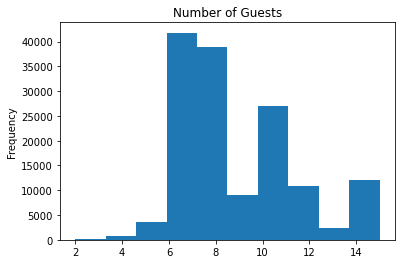

In [33]:
df_airbnb_market.guests_number.plot.hist()
plt.xticks(rotation=0)
plt.title('Number of Guests')
plt.show()

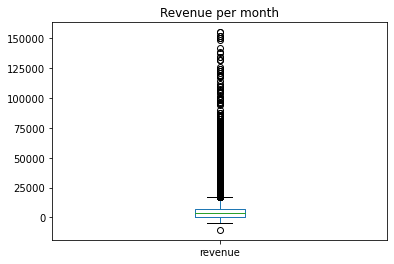

In [34]:
df_airbnb_market.revenue.plot.box()
plt.xticks(rotation=0)
plt.title('Revenue per month')
plt.show()

There are some clear outliers in this column, as well as negative values. Should we verify the quality of the data and possibility of negative values? How are these negative values associated with days the property is booked and rate per night?

In [35]:
df_airbnb_market.loc[df_airbnb_market['revenue'] <0, ['revenue', 'openness', 'occupancy', 'nightly_rate']].median()

revenue        -251.735000
openness         28.000000
occupancy         0.723810
nightly_rate    -32.843333
dtype: float64

These negative values seem to be due to the *nighly_rate* column and its negative values.

In [36]:
df_airbnb_market.nightly_rate.describe()

count    116632.000000
mean        426.533248
std         331.259907
min        -350.333002
25%         223.000000
50%         334.732331
75%         524.504032
max       10000.000000
Name: nightly_rate, dtype: float64

In [37]:
df_airbnb_market.nightly_rate.isna().sum()

29915

There are negative values that –given the nature of the column— shouldn't be there.

*What could these negative values mean? There are also 29915 null values. How could we impute them?*

In [38]:
#check some summary statistics for properties with negative nightly_rate
df_airbnb_market.loc[df_airbnb_market.nightly_rate<0, ['nightly_rate', 'bathrooms','bedrooms', 'revenue']].describe()

,nightly_rate,bathrooms,bedrooms,revenue
count,52.000000,52.000000,52.000000,52.000000
mean,-69.366526,2.230769,3.269231,-1040.613052
std,83.457983,0.730710,0.564137,1977.404144
min,-350.333002,1.000000,3.000000,-10509.990051
25%,-136.024998,2.000000,3.000000,-775.009951
50%,-32.843333,2.000000,3.000000,-251.735000
75%,-13.043306,2.500000,3.000000,-55.017498
max,-0.010000,4.500000,5.000000,-0.030000


In [39]:
#check some summary statistics for properties with negative nightly_rate
df_airbnb_market.loc[df_airbnb_market.nightly_rate>0, ['nightly_rate', 'bathrooms', 'bedrooms', 'revenue']].describe()

,nightly_rate,bathrooms,bedrooms,revenue
count,116580.000000,116580.000000,116580.000000,116580.000000
mean,426.754442,2.398362,3.396886,6722.603500
std,331.163532,0.789032,0.628059,7159.716205
min,0.649999,0.500000,3.000000,3.899994
25%,223.178030,2.000000,3.000000,2338.919983
50%,334.881944,2.000000,3.000000,4795.000000
75%,524.600000,3.000000,4.000000,8713.017502
max,10000.000000,7.000000,5.000000,155187.216797


I don't see a clear pattern (e.g. extra '-' sign introduced by mistake) that would allow to impute these negative values. So **I am leaving them as is and will filter out these observations when using this column in visualizations.
Null values, however, could be imputed using the formula *revenue/(openness*occupancy)***

In [40]:
#check if there is a lot of null values in source columns
df_airbnb_market[['nightly_rate','revenue','occupancy', 'openness']].isna().sum()

nightly_rate    29915
revenue            22
occupancy           0
openness            0
dtype: int64

In [41]:
#division by zero would give an error, so let's check zeros in the denominator column
df_airbnb_market.query('openness == 0').any().sum()

0

In [42]:
#impute the values starting the division by openness values, given that there are no zeros in this column
df_airbnb_market.nightly_rate.fillna(df_airbnb_market.revenue/df_airbnb_market.openness*df_airbnb_market.occupancy, inplace=True)
df_airbnb_market.nightly_rate.isna().sum()

22

There are still 22 nulls, the same number as in the revenue column.

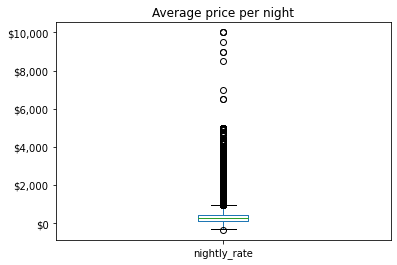

In [43]:
df_airbnb_market.nightly_rate.plot.box()
plt.title('Average price per night')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.show()

There are quite a few outliers. However, given some large properties in this dataset, these outliers could be real observations.

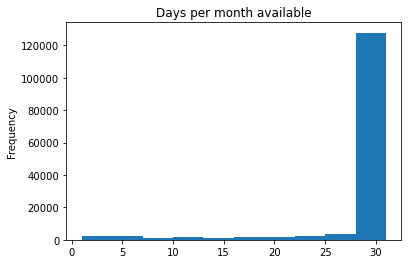

In [44]:
df_airbnb_market.openness.plot.hist()
plt.title('Days per month available')
plt.show()

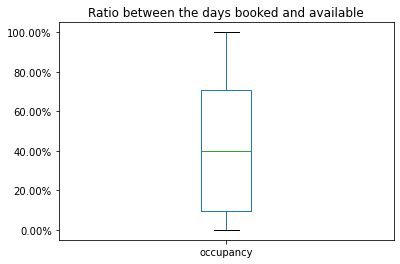

In [45]:
for_viz_occ = df_airbnb_market['occupancy'] *100
for_viz_occ.plot.box()
plt.title('Ratio between the days booked and available')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}%'))
plt.show()

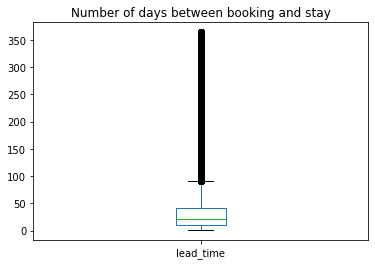

In [46]:
df_airbnb_market.lead_time.plot.box()
plt.title('Number of days between booking and stay')
plt.show()

In [47]:
df_airbnb_market.lead_time.describe()

count    107922.000000
mean         33.593980
std          39.714227
min           1.000000
25%          10.000000
50%          22.000000
75%          42.228632
max         364.000000
Name: lead_time, dtype: float64

There are some clear outliers in this column. Are they informative or just distort the data?

In [48]:
#calculate interquantile range for managing the outliers
qu_75 = df_airbnb_market.lead_time.quantile(0.75)
qu_25 = df_airbnb_market.lead_time.quantile(0.25)
iqr_one_n_half = 1.5*(qu_75 - qu_25)
#upper limit
upper_limit = iqr_one_n_half + qu_75
#lower limit
lower_limit = qu_25 - iqr_one_n_half
print(f'The lower limit would be: {lower_limit}\nThe upper limit would be: {upper_limit}')

The lower limit would be: -38.34294871794873
The upper limit would be: 90.5715811965812


In [49]:
df_airbnb_market.lead_time.isna().sum()

38625

There are no lower outliers, and triming all outliers over 88 would distort analysis. Let's have a look at other percentiles.

In [50]:
df_airbnb_market.lead_time.quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.90, 0.95, 0.98, 1])

0.10      3.800000
0.25     10.000000
0.50     22.000000
0.75     42.228632
0.80     49.142857
0.90     73.248077
0.95    102.166667
0.98    156.397778
1.00    364.000000
Name: lead_time, dtype: float64

*I am leaving these outliers because these might be real observations due some real people planning way beforehand. There are also 38625 nulls.*

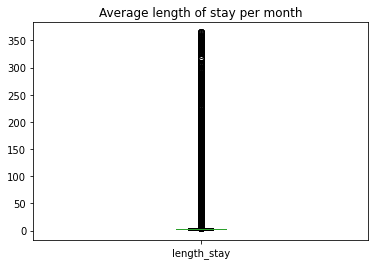

In [51]:
df_airbnb_market.length_stay.plot.box()
plt.title('Average length of stay per month')
plt.show()

In [52]:
df_airbnb_market.length_stay.describe()

count    107922.000000
mean          5.143434
std          17.556238
min           1.000000
25%           2.000000
50%           2.400000
75%           3.125000
max         365.000000
Name: length_stay, dtype: float64

It doesn't make sense to have values higher than 31 in a column that contains average number of days of the reservations made that month for that property. *Should I just reemplace these outliers by 31, 30, 28 or 29 (2020 is a leap year) depending on the month?*

In [53]:
#impute outliers for January, March, May, July, August, October & December
for i in ['2019', '2020', '2021', '2022']:      
    df_airbnb_market.loc[(df_airbnb_market['length_stay'] > 31)\
                    & (df_airbnb_market['month'].isin([i+'-1', i+'-3', i+'-5', i+'-7', i+'-8', i+'-10', i+'-12'])),\
                    'length_stay'] = 31

In [54]:
#impute outliers for February
df_airbnb_market.loc[(df_airbnb_market['length_stay'] > 28) & (df_airbnb_market['month'].isin(['2019-2', '2021-2', '2022-2'])), 'length_stay'] = 28
df_airbnb_market.loc[(df_airbnb_market['length_stay'] > 28) & (df_airbnb_market['month'] == '2020-2'), 'length_stay'] = 29


In [55]:
#impute outliers for April, June, September & November
for i in ['2019', '2020', '2021', '2022']:      
    df_airbnb_market.loc[(df_airbnb_market['length_stay'] > 30)\
                    & (df_airbnb_market['month'].isin([i+'-4', i+'-6', i+'-9', i+'-11'])), 'length_stay'] = 30

In [56]:
#check that the imputing worked
df_airbnb_market['length_stay'].describe()

count    107922.000000
mean          3.726753
std           5.147652
min           1.000000
25%           2.000000
50%           2.400000
75%           3.125000
max          31.000000
Name: length_stay, dtype: float64

### Amenities dataframe

In [57]:
df_airbnb_amenities.head(2)

,unified_id,month,hot_tub,pool
0,AIR10052559,2022-12,1,0
1,AIR10178668,2022-12,0,0


In [58]:
df_airbnb_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [59]:
df_airbnb_amenities.isna().sum()

unified_id    0
month         0
hot_tub       0
pool          0
dtype: int64

In [60]:
df_airbnb_amenities.duplicated().sum()

0

In [61]:
df_airbnb_amenities.hot_tub.value_counts()

1    25746
0    23565
Name: hot_tub, dtype: int64

In [62]:
df_airbnb_amenities.pool.value_counts()

0    45275
1     4036
Name: pool, dtype: int64

There are no null values in the Amenities dataframe. *Hot_tub* and *pool* columns have boolean values 0-1.

In [63]:
print(f'Number of unique months in Amenities: {df_airbnb_amenities.month.nunique()}')
df_airbnb_amenities.month.unique()

Number of unique months in Amenities: 36


array(['2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07',
       '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01',
       '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07',
       '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01',
       '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07',
       '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01'],
      dtype=object)

In Amenities the data is also aggregated at month level, but the observations range between 2020-01 and 2022-12, covering 36 months in total.

### Geolocation dataframe

In [64]:
df_airbnb_geo.head(3)

,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,NaN,34.24516,-116.87618


In [65]:
df_airbnb_geo.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unified_id   49311 non-null  object 
 1   month        49311 non-null  object 
 2   street_name  11589 non-null  object 
 3   latitude     49311 non-null  float64
 4   longitude    49311 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [66]:
df_airbnb_geo.duplicated().sum()

0

In [67]:
df_airbnb_geo.isna().sum()

unified_id         0
month              0
street_name    37722
latitude           0
longitude          0
dtype: int64

In [68]:
37722/49311

0.7649814443024883

Roughly 76% of values in the *street_name* column are nulls. This column can be dropped.

In [69]:
df_airbnb_geo.drop('street_name', axis=1, inplace=True)

In [70]:
df_airbnb_geo[['latitude', 'longitude']].describe()

,latitude,longitude
count,49311.000000,49311.000000
mean,34.224047,-116.781913
std,0.044215,0.212420
min,34.079448,-116.961096
25%,34.230960,-116.894150
50%,34.239720,-116.865280
75%,34.245920,-116.843510
max,34.304834,-116.002269


All latitudes and longitudes seem to belong roughly to the same area.

In [71]:
print(f'Number of unique months in Geolocation: {df_airbnb_geo.month.nunique()}')
df_airbnb_geo.month.unique()

Number of unique months in Geolocation: 36


array(['2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07',
       '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01',
       '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07',
       '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01',
       '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07',
       '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01'],
      dtype=object)

In Geolocation the data is also aggregated at month level, and as in Amenities, the observations range between 2020-01 and 2022-12, covering 36 months in total.

## Joining three Airbnb dataframes

All four dataframes appear to have in common the *unified_id* column.

In [72]:
print(f'Number of unique IDs in Market Analysis: {df_airbnb_market.unified_id.nunique()}')
print(f'Number of unique IDs in Amenities: {df_airbnb_amenities.unified_id.nunique()}')
print(f'Number of unique IDs in Geolocation: {df_airbnb_geo.unified_id.nunique()}')

Number of unique IDs in Market Analysis: 9929
Number of unique IDs in Amenities: 2151
Number of unique IDs in Geolocation: 2151


There definetely more listings in the Market Analysis dataframes than complementary data in Amenities and Geolocation. Speaking about Amenities and Geolocation dataframes, are there data for all 36 months for every listing. Can we just take data for 2020-01 as the date closest to the Market Analysis 2019 dates and for 2022-12 for market analysis 2020-2022?

In [73]:
df_airbnb_amenities.groupby('unified_id')['month'].count()

unified_id
AIR10000347    21
AIR10052559    35
AIR10178668    36
AIR10204420     4
AIR10211502    18
               ..
AIR9959855     33
AIR9960008     36
AIR9976790     33
AIR9986505     22
AIR9996370     26
Name: month, Length: 2151, dtype: int64

In [74]:
df_airbnb_geo.groupby('unified_id')['month'].count()

unified_id
AIR10000347    21
AIR10052559    35
AIR10178668    36
AIR10204420     4
AIR10211502    18
               ..
AIR9959855     33
AIR9960008     36
AIR9976790     33
AIR9986505     22
AIR9996370     26
Name: month, Length: 2151, dtype: int64

Given that the data is not distributed evenly across listings and months, let's check it there have been any changes in hot_tub and pool status.

In [75]:
#changes for hot_tub
hot_tub_check = df_airbnb_amenities.groupby('unified_id', as_index=False)[['hot_tub', 'month']].aggregate({'hot_tub':'sum', 'month':'count'})
hot_tub_check.query('hot_tub != 0 & hot_tub < month').shape

(137, 3)

In [76]:
#changes for pool
hot_tub_check = df_airbnb_amenities.groupby('unified_id', as_index=False)[['pool', 'month']].aggregate({'pool':'sum', 'month':'count'})
hot_tub_check.query('pool != 0 & pool < month').shape

(48, 3)

There are 137 listings where a hot_tub was added or dismantled during 2019-2022 and 48 such cased for pool.

For the purposes of this analysis let's make a rough approximation, classing a listing as one with hot_tub or a pool, if it has had it for at least half of the time.

In [77]:
#create a new dataframe with 
df_amenities_short = df_airbnb_amenities.groupby('unified_id', as_index=False)[['hot_tub', 'pool']].sum()
df_amenities_short['hot_tub'] = df_amenities_short['hot_tub']>=24
df_amenities_short['pool'] = df_amenities_short['pool']>=24
df_amenities_short.shape

(2151, 3)

Let's take the latest observation for geolocation because this is inmutable in case of real estate, and changes would be most likely due to precision updates.

In [78]:
#filter out month-level observations for Geolocation leaving only the latest one because geolocation doesn't change,
#but tends to become more accurate overtime
new_df_geo = df_airbnb_geo.groupby('unified_id', as_index=False)['month'].max()
df_airbnb_geo = df_airbnb_geo.merge(new_df_geo, how='inner', on=['unified_id', 'month'])
#leave only the listing's id and latitude&longitude values
df_airbnb_geo.drop('month', axis=1, inplace=True)
df_airbnb_geo.shape

(2151, 3)

The resulting number of rows corresponds to the number of unique *unified_id* values in Amenities and Geolocation tables.

In order to add addiotional information to the Market Analysis dataframe I will use a left join with Amenities and Geolocation dataframes.

In [79]:
df_airbnb_two = df_airbnb_market.merge(df_amenities_short, how='left', on='unified_id')
df_airbnb_complete = df_airbnb_two.merge(df_airbnb_geo, how='left', on='unified_id')
#replace boolean values with 'Yes', 'No' and 'No data' for hot_tub column
df_airbnb_complete.loc[df_airbnb_complete['hot_tub'] == 1, 'hot_tub'] = 'Yes'
df_airbnb_complete.loc[df_airbnb_complete['hot_tub'] == 0, 'hot_tub'] = 'No'
df_airbnb_complete.loc[df_airbnb_complete['hot_tub'].isna(), 'hot_tub'] = 'No data'
#replace boolean values with 'Yes', 'No' and 'No data' for pool column
df_airbnb_complete.loc[df_airbnb_complete['pool'] == 1, 'pool'] = 'Yes'
df_airbnb_complete.loc[df_airbnb_complete['pool'] == 0, 'pool'] = 'No'
df_airbnb_complete.loc[df_airbnb_complete['pool'].isna(), 'pool'] = 'No data'
#list of resulting columns
print(*list(df_airbnb_complete.columns), sep=', ')
#dimensions of the resulting df
df_airbnb_complete.shape

unified_id, month, zipcode, city, host_type, bedrooms, bathrooms, guests, revenue, openness, occupancy, nightly_rate, lead_time, length_stay, guests_number, hot_tub, pool, latitude, longitude


(146547, 19)

The shape of the resulting dataset corresponds to the expected shape: 146547 rows of the Market Analysis dataframe and its 14 original columns + 1 calculated column + 4 columns added from Amenities and Geolocation.

## Sales properties dataframes

Let's have a look at the dataframes' dimensions, duplicates and null values.

In [80]:
dictionary_sales ={'"Properties in 92252 zipcode (total)"': df_sales_92252_total,
                   '"Properties in 92284 zipcode (total)"': df_sales_92284_total,
                   '"Properties in 92314 zipcode (total)"': df_sales_92314_total,
                   '"Properties in 92315 zipcode (total)"': df_sales_92315_total,
                   '"Properties in 92284 zipcode (with pool)"': df_sales_92284_pool,
                   '"Properties in 92252 zipcode (with pool)"': df_sales_92252_pool
                  }
for key, value in dictionary_sales.items():
    print(f'The {key} dataframe has:\n\t{value.shape[0]} rows and {value.shape[1]}\
 columns\n\t{value.duplicated().sum()} duplicated values\n\t{value.isna().any().sum()} column(s) with null values')

The "Properties in 92252 zipcode (total)" dataframe has:
	73 rows and 23 columns
	0 duplicated values
	3 column(s) with null values
The "Properties in 92284 zipcode (total)" dataframe has:
	117 rows and 23 columns
	0 duplicated values
	3 column(s) with null values
The "Properties in 92314 zipcode (total)" dataframe has:
	57 rows and 23 columns
	0 duplicated values
	4 column(s) with null values
The "Properties in 92315 zipcode (total)" dataframe has:
	106 rows and 23 columns
	0 duplicated values
	4 column(s) with null values
The "Properties in 92284 zipcode (with pool)" dataframe has:
	15 rows and 23 columns
	0 duplicated values
	1 column(s) with null values
The "Properties in 92252 zipcode (with pool)" dataframe has:
	15 rows and 23 columns
	0 duplicated values
	3 column(s) with null values


In [81]:
df_sales_92252_total.head(3)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,CA,USA,AKGRE Inc,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,CA,USA,Champion Realty,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,True,True,True,False,For Sale (Broker),House for sale,FOR_SALE


In [82]:
df_sales_92252_pool.head(3)

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/61854-Crest...,392179.0,399000,1897.0,Not specified,2,3,1100,NaN,SINGLE_FAMILY,...,CA,USA,REAL BROKERAGE TECHNOLOGIES,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4741-Avenid...,753106.0,769000,2901.0,Not specified,3,4,1871,NaN,SINGLE_FAMILY,...,CA,USA,Backbeat Homes,True,True,False,False,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/63973-Gold-...,1505009.0,1560000,1823.0,Not specified,3,3,1538,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,False,True,False,False,New Construction,New construction,FOR_SALE


In [83]:
if (df_sales_92252_total.columns == df_sales_92314_total.columns).all()\
and (df_sales_92284_total.columns == df_sales_92314_total.columns).all()\
and (df_sales_92284_total.columns == df_sales_92315_total.columns).all()\
and (df_sales_92252_pool.columns == df_sales_92315_total.columns).all()\
and (df_sales_92252_pool.columns == df_sales_92284_pool.columns).all():
    print('Columns in all six dataframes have the same names.')

Columns in all six dataframes have the same names.


In [84]:
df_sales_92252_total.columns

Index(['Url', 'Zestimate', 'Price', 'Rent Zestimate', 'Days On Zillow',
       'Bathrooms', 'Bedrooms', 'Living Area', 'Lot Size', 'Home Type',
       'Street Address', 'City', 'Zip', 'State', 'Country', 'Broker Name',
       'Has 3D Model', 'Has Image', 'Has Video', 'isZillowOwned', 'sgapt',
       'statusText', 'statusType'],
      dtype='object')

In [85]:
#change the columns' names for easier use
for value in dictionary_sales.values():
    value.rename(columns={'Rent Zestimate': 'Rent_Zestimate',
                          'Days On Zillow':'Days_On_Zillow',
                          'Living Area': 'Living_Area',
                          'Lot Size': 'Lot_Size',
                          'Home Type': 'Home_Type',
                          'Street Address': 'Street_Address',
                          'Broker Name': 'Broker_Name',
                          'Has 3D Model': 'Has_3D_Model',
                          'Has Image': 'Has_Image',
                          'Has Video': 'Has_Video'                         
                         }, inplace=True)


Given that the columns names are the same across all six dataframes, we can perform a union on four total dataframes to get one dataframe for all zipcodes.

In [86]:
#combine four total dataframes
df_properties_total = pd.concat([df_sales_92252_total, df_sales_92284_total, df_sales_92314_total, df_sales_92315_total])
df_properties_total.shape

(353, 23)

The dimensions of the resulting dataframe correspond to its expected shape (the sum of rows of 4 dataframes and 23 rows).

In [87]:
df_properties_total.head(3)

,Url,Zestimate,Price,Rent_Zestimate,Days_On_Zillow,Bathrooms,Bedrooms,Living_Area,Lot_Size,Home_Type,...,State,Country,Broker_Name,Has_3D_Model,Has_Image,Has_Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,CA,USA,AKGRE Inc,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,CA,USA,Champion Realty,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,True,True,True,False,For Sale (Broker),House for sale,FOR_SALE


In [88]:
#combine 2 pool dataframes
df_properties_pool = pd.concat([df_sales_92252_pool, df_sales_92284_pool])
df_properties_pool.shape

(30, 23)

The dimensions of the resulting dataframe correspond to its expected shape (the sum of row of 2 dataframes and 23 rows).

In [89]:
#add a True/False column to pool dataset
df_properties_pool['Pool'] = True
df_properties_pool.head(3)

,Url,Zestimate,Price,Rent_Zestimate,Days_On_Zillow,Bathrooms,Bedrooms,Living_Area,Lot_Size,Home_Type,...,Country,Broker_Name,Has_3D_Model,Has_Image,Has_Video,isZillowOwned,sgapt,statusText,statusType,Pool
0,https://www.zillow.com/homedetails/61854-Crest...,392179.0,399000,1897.0,Not specified,2,3,1100,NaN,SINGLE_FAMILY,...,USA,REAL BROKERAGE TECHNOLOGIES,False,True,False,False,For Sale (Broker),House for sale,FOR_SALE,True
1,https://www.zillow.com/homedetails/4741-Avenid...,753106.0,769000,2901.0,Not specified,3,4,1871,NaN,SINGLE_FAMILY,...,USA,Backbeat Homes,True,True,False,False,For Sale (Broker),House for sale,FOR_SALE,True
2,https://www.zillow.com/homedetails/63973-Gold-...,1505009.0,1560000,1823.0,Not specified,3,3,1538,NaN,SINGLE_FAMILY,...,USA,BHG Desert Lifestyle Properties,False,True,False,False,New Construction,New construction,FOR_SALE,True


In [90]:
#join all dataframes in one with extra column for Pool
df_properties_full = df_properties_total.merge(df_properties_pool, how='left', on=list(df_properties_total.columns))
df_properties_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Url             353 non-null    object 
 1   Zestimate       321 non-null    float64
 2   Price           353 non-null    int64  
 3   Rent_Zestimate  330 non-null    float64
 4   Days_On_Zillow  353 non-null    object 
 5   Bathrooms       353 non-null    int64  
 6   Bedrooms        353 non-null    int64  
 7   Living_Area     353 non-null    int64  
 8   Lot_Size        0 non-null      float64
 9   Home_Type       353 non-null    object 
 10  Street_Address  353 non-null    object 
 11  City            353 non-null    object 
 12  Zip             353 non-null    int64  
 13  State           353 non-null    object 
 14  Country         353 non-null    object 
 15  Broker_Name     330 non-null    object 
 16  Has_3D_Model    353 non-null    bool   
 17  Has_Image       353 non-null    boo

The df_properties_full dataframe correspond to the expected result in terms of number of rows, columns and non null values in the *Pool* column.

In [91]:
#fill the null values with False for zipcodes 92284 and 92252
df_properties_full.loc[(df_properties_full['Zip'].isin([92284,92252])) & (df_properties_full['Pool'] != True), 'Pool'] = False

In [92]:
df_properties_full.loc[df_properties_full['Zip'].isin([92284,92252]), 'Pool'].value_counts()

False    160
True      30
Name: Pool, dtype: int64

In [93]:
#fill the null values for other zipcodes with 'No data available'
df_properties_full['Pool'].fillna('No data available', inplace=True)

In [94]:
df_properties_full['Pool'].value_counts()

No data available    163
False                160
True                  30
Name: Pool, dtype: int64

In [95]:
df_properties_full.Lot_Size.unique()

array([nan])

The *Lot_Size* column is composed of nulls, so it can be dropped.

In [96]:
df_properties_full.drop('Lot_Size', axis=1, inplace=True)

### Object-type columns

In [97]:
df_properties_full.Days_On_Zillow.unique()

array(['Not specified'], dtype=object)

In [98]:
df_properties_full.Home_Type.unique()

array(['SINGLE_FAMILY'], dtype=object)

There is no informative data in the columns *Days_On_Zillow* and *Home_Type*, so they can be dropped.

In [99]:
df_properties_full.drop('Days_On_Zillow', axis=1, inplace=True)
df_properties_full.drop('Home_Type', axis=1, inplace=True)

In [100]:
df_properties_full.Country.unique()

array(['USA'], dtype=object)

In [101]:
df_properties_full.State.unique()

array(['CA'], dtype=object)

The Country and State columns contain only one value and are not informative.

In [102]:
df_properties_full.drop('Country', axis=1, inplace=True)
df_properties_full.drop('State', axis=1, inplace=True)

In [103]:
df_properties_full.City.unique()

array(['Joshua Tree', 'Panorama Heights', 'Yucca Valley', 'Big Bear City',
       'Big Bear Lake'], dtype=object)

The properties in 'Panorama Heights' & 'Yucca Valley' might not be of interest but let's check the zipcodes first.

In [104]:
df_properties_full.Zip.unique()

array([92252, 92284, 92314, 92315], dtype=int64)

All zipcodes correspond to Big Bear and Joshua Tree and their surroundings.

In [105]:
df_properties_full.Street_Address.unique()

array(['8198 Uphill Rd', '4757 Avenida La Espana Daga',
       '61018 Prescott Trl', '61875 Anaconda Dr', '61879 Petunia Dr',
       '7201 Demesne Rd', '61854 Crest Cir', '61635 Adobe Dr',
       '60217 Sunny Sands Dr', '65226 Broadway St', '61756 Navajo Trl',
       '4741 Avenida Del Sol', '7835 Conejo Ave',
       '4851 Avenida La Manana', '678 Polaris Ave',
       '63973 Gold Nugget Ave', '60425 Alta Mura Dr', '64827 3rd St S',
       '61880 Valley View Cir', '60184 Natoma Trl', '61415 Alta Loma Dr',
       '62176 Highland View Dr', '61970 Petunia Dr', '7736 Elwood St',
       '2651 Foxy Flats Rd', '60440 Granada Dr', '61464 Melton Trl',
       '2838 Rice Ave', '6315 El Reposo Cir', '3382 Center Ave',
       '61727 Morningside Rd', '7153 Olympic Rd', '7037 Conejo Ave',
       '8080 Wesley Rd', '885 Sungold Ave', '4622 Avenida La Mirada Trl',
       '61745 Pueblo Trl', '61836 Grand View Cir', '6715 Torres Ave',
       '61426 Alta Vista Dr', '6655 Cascade Rd', '60440 Alta Mesa Dr',
  

The quality of the *street address* columns seems to be rather good.

In [106]:
df_properties_full.Broker_Name.nunique()

142

In [107]:
sorted(list(df_properties_full.Broker_Name.dropna().str.capitalize().unique()))

['A + realty & mortgage',
 'Active realty',
 'Akgre inc',
 'All nations realty & invs',
 'All star realty',
 'Alpine realty',
 'Alta realty group ca, inc',
 'Alticore realty',
 'Amer jakher',
 'Backbeat homes',
 'Berkshire hathaway h.s.c.p.',
 'Berkshire hathaway homeservice',
 'Berkshire hathaway homeservices',
 'Berkshire hathaway homeservices california properties',
 'Beverly and company, inc.',
 'Bhg desert lifestyle properties',
 'Bhhs ca properties',
 'Blockchain realty, inc.',
 'Braxton real estate',
 'Bruin trojan realtors, inc',
 'Bruin trojan realtors, inc.',
 'Building joshua tree real estate',
 'California realty solutions',
 'Capital real estate & inv',
 'Capitis real estate',
 'Century 21 allstars',
 'Century 21 lotus',
 'Century 21 peak',
 'Century 21 realty masters',
 'Century 21 wright',
 'Champion realty',
 'Charis real estate',
 'Cherie miller & assoc.',
 'Choice real estate brokers',
 'Coldwell banker home source',
 'Coldwell banker realty',
 'Coldwell banker roadru

The *Broker_Name* column has some duplicates like 'eXp Realty of California Inc' and 'EXP REALTY OF CALIFORNIA INC' due to different case-use or different degrees of detail as in 'Berkshire Hathaway H.S.C.P.', 'Berkshire Hathaway HomeService', 'Berkshire Hathaway HomeServices' and 'Berkshire Hathaway HomeServices California Properties'.These should be homogenized in order to eliminate misleading duplicates.

There is also another group of potentially duplicate entries in this column. They have similar sounding names, but that could be just a coincidence. For example, 'Coldwell banker home source', 'Coldwell banker realty', 'Coldwell banker roadrunner', 'Coldwell banker sky ridge rlty' could be the same or not. The same holds for 'Homesmart', 'Homesmart evergreen realty', 'Homesmart professionals' & 'Homesmart, evergreen realty'. Without further clarification I am leaving these as is.

In [108]:
df_properties_full['Broker_Name'].fillna('No data available', inplace=True)

In [109]:
#homogenize different versions of Bruin Trojan Realtors, Inc.
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains('Bruin Trojan Realtors', flags=re.IGNORECASE), 'Broker_Name'] = 'Bruin Trojan Realtors, Inc.'

In [110]:
#homogenize different versions of Berkshire Hathaway H.S.C.P.
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains('Berkshire Hathaway', flags=re.IGNORECASE), 'Broker_Name'] = 'Berkshire Hathaway H.S.C.P.'

In [111]:
#homogenize different versions of eXp Realty of California Inc.
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains('Exp realty of california inc', flags=re.IGNORECASE), 'Broker_Name'] = 'eXp Realty of California Inc.'

In [112]:
#homogenize different versions of HomeSmart Evergreen Realty (not sure if Homesmart and Homesmart Professionals is the same)
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains('evergreen realty', flags=re.IGNORECASE), 'Broker_Name'] = 'HomeSmart Evergreen Realty'

In [113]:
#homogenize different versions of Vacasa Real Estate Corp.
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains('Vacasa real estate', flags=re.IGNORECASE), 'Broker_Name'] = 'Vacasa Real Estate Corp.'

In [114]:
#homogenize different versions of Wheeler Steffen Sotheby's Int.
df_properties_full.loc[df_properties_full['Broker_Name'].\
                       str.contains("Wheeler steffen sotheby's", flags=re.IGNORECASE), 'Broker_Name'] = "Wheeler Steffen Sotheby's Int."

In [115]:
#check how many duplicates were homogenized
df_properties_full.Broker_Name.nunique()

133

In [116]:
df_properties_full.sgapt.value_counts()

For Sale (Broker)    323
New Construction      26
Foreclosure            3
Unknown Listed By      1
Name: sgapt, dtype: int64

In [117]:
df_properties_full.statusText.value_counts()

House for sale      323
New construction     26
Foreclosure           3
Auction               1
Name: statusText, dtype: int64

Are "For Sale (Broker)" in *sgapt* and "House for sale" in *statusText* the same?

In [118]:
df_properties_full.query('sgapt == "For Sale (Broker)" & statusText != "House for sale"').any().sum()

0

Given that all but 1 values match in these columns (except "Unknown Listed By" vs "Auction"), a less complete one can be dropped.

In [119]:
df_properties_full.drop('sgapt', axis=1, inplace=True)

In [120]:
df_properties_full.statusType.unique()

array(['FOR_SALE'], dtype=object)

*statusType* column is not informative and can be dropped 

In [121]:
df_properties_full.drop('statusType', axis=1, inplace=True)

### Numeric columns

The Zestimate home valuation model is Zillow’s estimate of a home’s market value. A Zestimate incorporates public, MLS and user-submitted data into Zillow’s proprietary formula, also taking into account home facts, location and market trends. It is not an appraisal and can’t be used in place of an appraisal.

In [122]:
df_properties_full.Zestimate.describe()

count    3.210000e+02
mean     7.251005e+05
std      4.493897e+05
min      2.224200e+05
25%      4.492000e+05
50%      6.140000e+05
75%      8.518000e+05
max      4.290900e+06
Name: Zestimate, dtype: float64

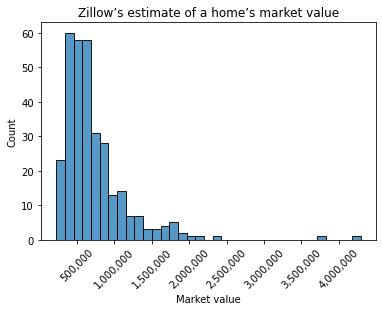

In [123]:
sns.histplot(df_properties_full.Zestimate)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Zillow’s estimate of a home’s market value')
plt.xlabel('Market value')
plt.xticks(rotation=45)
plt.show()

Technically there are some outliers in this column, but they don't seem to be due to error.

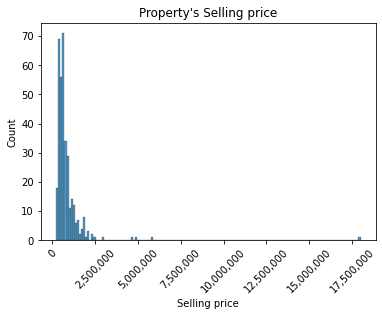

In [124]:
sns.histplot(df_properties_full.Price)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.title("Property's Selling price")
plt.xlabel('Selling price')
plt.show()

In [125]:
df_properties_full.Price.quantile([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

0.25     469999.0
0.50     649000.0
0.75     899950.0
0.80     997250.0
0.90    1400000.0
0.95    1799900.0
0.99    3789400.0
Name: Price, dtype: float64

In [126]:
#check price and living area for the last percentile
df_properties_full.loc[df_properties_full.Price > 3789400, ['Price', 'Living_Area']]

,Price,Living_Area
0,18000000,5470
285,4855356,7236
290,4650000,6750
311,5895000,5734


In [127]:
round(df_properties_full[['Price', 'Living_Area']].median())

Price          649000.0
Living_Area      1820.0
dtype: float64

These properties with extremely high prices do seem to have much larger living area than median values for the dataset. So I am keeping them as is.

Rent_Zestimate is Zillow’s estimated monthly rent price, a starting point in determining the monthly rental price for a specific property.

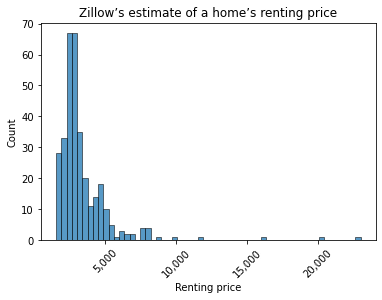

In [128]:
sns.histplot(df_properties_full.Rent_Zestimate)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Zillow’s estimate of a home’s renting price')
plt.xticks(rotation=45)
plt.xlabel('Renting price')
plt.show()

In [129]:
df_properties_full.Rent_Zestimate.describe()

count      330.000000
mean      3428.169697
std       2139.690844
min       1545.000000
25%       2369.500000
50%       2972.500000
75%       3655.750000
max      22993.000000
Name: Rent_Zestimate, dtype: float64

In [130]:
df_properties_full.Rent_Zestimate.quantile([0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

0.25     2369.50
0.50     2972.50
0.75     3655.75
0.80     4192.40
0.90     4945.30
0.95     6674.30
0.99    11275.22
Name: Rent_Zestimate, dtype: float64

In [131]:
#check price and living area for the last percentile
df_properties_full.loc[df_properties_full.Price > 3789400, ['Rent_Zestimate', 'Living_Area']]

,Rent_Zestimate,Living_Area
0,2435.0,5470
285,20182.0,7236
290,16179.0,6750
311,22993.0,5734


As in the case of *Price*, extreme values correspond to much larger than the median properties. So I am keeping these outliers as well.

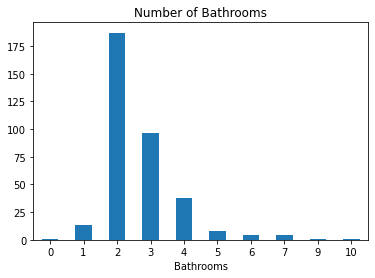

In [132]:
df_properties_full.groupby('Bathrooms')['Bathrooms'].count().plot.bar()
plt.xticks(rotation=0)
plt.title('Number of Bathrooms')
plt.show()

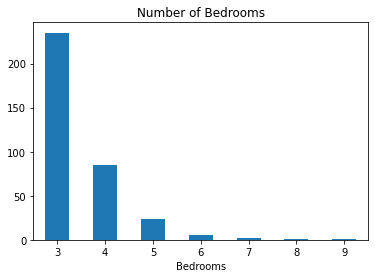

In [133]:
df_properties_full.groupby('Bedrooms')['Bedrooms'].count().plot.bar()
plt.xticks(rotation=0)
plt.title('Number of Bedrooms')
plt.show()

In [134]:
#check the living_area's summary statistics
df_properties_full.Living_Area.describe()

count     353.000000
mean     2074.951841
std      1013.150142
min       680.000000
25%      1431.000000
50%      1820.000000
75%      2344.000000
max      7236.000000
Name: Living_Area, dtype: float64

Given that the Living Area is in square feet and the analysis is presented in a country with metric system, it would be useful to have this column's values in square meters.

In [135]:
#convert square feet to square meters with the formula 1 sq. ft = 0.09290304 sq. m
df_properties_full['Living_Area'] = round(df_properties_full['Living_Area'] * 0.09290304,2)

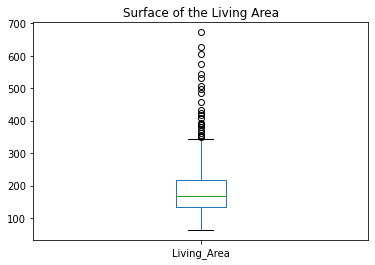

In [136]:
df_properties_full.Living_Area.plot.box()
plt.title('Surface of the Living Area')
plt.show()

There are some outliers in this column, but as we have already seen they tend to correlate with higher estimated value and price and seem plausible.

### Bool-type columns

 16  Has_3D_Model    353 non-null    bool   
 17  Has_Image       353 non-null    bool   
 18  Has_Video       353 non-null    bool   
 19  isZillowOwned   353 non-null    bool   

In [137]:
df_properties_full.Has_3D_Model.value_counts()

False    330
True      23
Name: Has_3D_Model, dtype: int64

In [138]:
df_properties_full.Has_Image.value_counts()

True    353
Name: Has_Image, dtype: int64

In [139]:
df_properties_full.Has_Video.value_counts()

False    342
True      11
Name: Has_Video, dtype: int64

In [140]:
df_properties_full.isZillowOwned.value_counts()

False    353
Name: isZillowOwned, dtype: int64

All properties have images and none is owned by Zillow. Hence *Has_Image* and *isZillowOwned* columns are not informative and can be dropped.

In [141]:
df_properties_full.drop(['Has_Image', 'isZillowOwned'], axis=1, inplace=True)

In [142]:
df_properties_full.shape

(353, 15)

A total of 8 uninformative columns were dropped from this dataframe, leaving the following columns:

In [143]:
print(*list(df_properties_full.columns), sep=', ')

Url, Zestimate, Price, Rent_Zestimate, Bathrooms, Bedrooms, Living_Area, Street_Address, City, Zip, Broker_Name, Has_3D_Model, Has_Video, statusText, Pool


It would be interesting to use both dataframes' data to calculate rent-to-sales ratio based both on real revenue from Market Analysis dataframe and rent price estimated by Zillow. Let's enrich the Properties dataframe with aggregated data from Market Analysis joining them on zipcode and number of bedrooms and number of bathrooms to eventually measure the relationship between a property’s annual rental income and the property’s purchase price.

In [144]:
#check the contents of columns to be used in the join
df_airbnb_complete[['zipcode', 'bedrooms', 'bathrooms']].head(3)

,zipcode,bedrooms,bathrooms
0,92315,3,2.0
1,92315,3,2.0
2,92315,3,2.0


In [145]:
#check for nulls
df_airbnb_complete[['zipcode', 'bedrooms', 'bathrooms']].isna().sum()

zipcode      0
bedrooms     0
bathrooms    0
dtype: int64

In [146]:
#check the contents of columns to be used in the join
df_properties_full[['Zip', 'Bathrooms', 'Bedrooms']].head(3)

,Zip,Bathrooms,Bedrooms
0,92252,4,3
1,92252,2,3
2,92252,2,3


In [147]:
#check for nulls
df_properties_full[['Zip', 'Bathrooms', 'Bedrooms']].isna().sum()

Zip          0
Bathrooms    0
Bedrooms     0
dtype: int64

There are no nulls, however, the date type for number of bedrooms doesn't match. I will round the float values with ceil() function because 0.5 in the first dataframe are likely to a bathroom that has a sink and a toilet, but no shower or bath.
First, let's prepare the aggregated subset from market analysis df.

In [148]:
#subset the original dataframe filtering out observations with negative revenue and low openness of less than 15 days
df_market_subset = df_airbnb_complete.loc[(df_airbnb_complete.revenue >= 0) & (df_airbnb_complete.openness >=15), ['unified_id','zipcode', 'month','bedrooms', 'bathrooms', 'revenue']]
#round the bathrooms and convert to integer
df_market_subset.loc[:,'bathrooms'] = df_market_subset.loc[:,'bathrooms'].apply(np.ceil).astype('int64')
#check the result
df_market_subset.bathrooms.value_counts()

2    76851
3    38617
4    12226
1     6386
5     3002
6      802
7      106
Name: bathrooms, dtype: int64

In [149]:
df_market_subset.dtypes

unified_id     object
zipcode         int64
month          object
bedrooms        int64
bathrooms       int64
revenue       float64
dtype: object

Here we need only the year, but the month column is of string type.

In [150]:
#convert month to datetime and extract only the year
df_market_subset['year'] = pd.to_datetime(df_market_subset['month'], format='%Y-%m').dt.year

In [151]:
df_market_subset['year'].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

In [152]:
#aggregate the df calculating the year sum for the revenue column for each unified_id
df_market_subset = df_market_subset.groupby(['unified_id', 'zipcode', 'bedrooms', 'bathrooms', 'year'], as_index=False)['revenue'].sum()

In [153]:
df_market_subset.head(3)

,unified_id,zipcode,bedrooms,bathrooms,year,revenue
0,58748,92315,4,2,2020,100839.160065
1,58748,92315,4,2,2021,76395.000000
2,58748,92315,4,2,2022,0.000000


In [154]:
#aggregate the df calculating the median as a more robust metric given that we still have some outliers in the revenue column
df_market_subset = df_market_subset.groupby(['zipcode', 'bedrooms', 'bathrooms'], as_index=False)['revenue'].median()
#rename columns to make joining easier
df_market_subset.rename(columns={'zipcode':'Zip', 'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'revenue': 'yearly_revenue_airbnb'}, inplace=True)
df_market_subset.head(3)

,Zip,Bedrooms,Bathrooms,yearly_revenue_airbnb
0,92252,3,1,24141.5
1,92252,3,2,34088.0
2,92252,3,3,50878.0


In [155]:
#perform left join on properties and the subset of market analysis df
df_properties_enriched = df_properties_full.merge(df_market_subset, how='left', on=['Zip', 'Bedrooms', 'Bathrooms'])
df_properties_enriched.shape

(353, 16)

In [156]:
df_properties_enriched.head(3)

,Url,Zestimate,Price,Rent_Zestimate,Bathrooms,Bedrooms,Living_Area,Street_Address,City,Zip,Broker_Name,Has_3D_Model,Has_Video,statusText,Pool,yearly_revenue_airbnb
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,4,3,508.18,8198 Uphill Rd,Joshua Tree,92252,AKGRE Inc,False,False,House for sale,False,69679.381088
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,2,3,98.11,4757 Avenida La Espana Daga,Joshua Tree,92252,Champion Realty,False,False,House for sale,False,34088.000000
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,2,3,146.51,61018 Prescott Trl,Joshua Tree,92252,BHG Desert Lifestyle Properties,True,True,House for sale,False,34088.000000


In [157]:
df_airbnb_complete.to_csv('airbnb_listings_CA.csv', index=False, sep=';')
df_properties_full.to_csv('properties_for_sale_CA.csv', index=False, sep=';')
df_properties_enriched.to_csv('properties_and_revenue_CA.csv', index=False, sep=';')